In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from freq_pd import proc_freq

In [4]:
final_clusters = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\final_clusters22.csv',dtype={'Item_Number':str}, index_col=0)

In [5]:
tdtypes = {'Store_Number':str,'Vendor_Number':str,'Item_Number':str, 'Category':str}

In [6]:
trans = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\transactions_2021.csv',dtype=tdtypes, index_col=0)

In [7]:
stores = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_2021.csv',index_col=0, dtype={'Zip_Code':str,'Store_Number':str})

In [8]:
stdtypes = {'Store_Number':str,'Vendor_Number':str,'Item_Number':str, 'Category':str,
            'Zip_Code':str}

In [9]:
store_trans = stores.merge(trans, how='inner', on=['Store_Number'])

In [10]:
store_trans_cluster = store_trans[['Store_Number',
 'Store_Name',
 'Address',
 'City',
 'Zip_Code',
 'Store_Location',
 'County_Number',
 'County',
 'Vendor_Number',
 'Item_Number','Category','Sales']].merge(final_clusters, how='inner', on=['Item_Number'])

In [11]:

store_trans_cluster = store_trans_cluster.rename(columns={'Sales':'revenue'})

In [12]:
store_trans_cluster.shape

(2473851, 15)

#### format to make commas show in numeric features

In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

In [14]:
store_trans_cluster.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Vendor_Number,Item_Number,Category,revenue,Item_Description,cluster_name,New_Category_Name
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,035,88296,1022200,123.75,Patron Silver,Popular_Bottles,Tequila
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,035,88296,1022200,82.5,Patron Silver,Popular_Bottles,Tequila
2,5566,East End Liquor & Tobacco,3804 Hubbell Ave,Des Moines,50317,POINT (-93.541351 41.630849),77,POLK,035,88296,1022200,990.0,Patron Silver,Popular_Bottles,Tequila
3,4755,Walgreens #05941 / Mason City,1251 4th St SW,Mason City,50401,POINT (-93.220422 43.148333),17,CERRO GORD,035,88296,1022200,495.0,Patron Silver,Popular_Bottles,Tequila
4,5167,New Star Liquor & Tobacco / Ft Dodg,1724 5th Ave S,Fort Dodge,50501,POINT (-94.173816 42.501131),94,WEBSTER,035,88296,1022200,495.0,Patron Silver,Popular_Bottles,Tequila


In [15]:
final_clusters.cluster_name.value_counts() 

Most_Variety         2199
Moderately_High       877
Volume_For_Dollar     454
Quick_Shots           436
High_End              157
Cheap                 136
Popular_Bottles        42
Name: cluster_name, dtype: int64

In [16]:
# final_clusters.New_Category_Name.value_counts(normalize=True).round(4) *100

In [17]:
# ['Temporary & Specialty Packages','Special Order Items',]

In [18]:
# final_clusters.loc[final_clusters.cluster_name== 'Most_Variety']['New_Category_Name'].value_counts(normalize=True)

In [19]:
# final_clusters.loc[final_clusters.cluster_name== 'Moderately_High']['New_Category_Name'].value_counts(normalize=True)

In [20]:
# final_clusters.loc[final_clusters.cluster_name== 'Volume_For_Dollar']['New_Category_Name'].value_counts(normalize=True)

In [21]:
# final_clusters.loc[final_clusters.cluster_name== 'Quick_Shots']['New_Category_Name'].value_counts(normalize=True)      

In [22]:
# final_clusters.loc[final_clusters.cluster_name == 'High_End']['New_Category_Name'].value_counts(normalize=True)      

In [23]:
# final_clusters.loc[final_clusters.cluster_name== 'Cheap']['New_Category_Name'].value_counts(normalize=True)

In [24]:
# final_clusters.loc[final_clusters.cluster_name== 'Popular_Bottles']['New_Category_Name'].value_counts(normalize=True)

In [25]:
final_clusters.loc[(final_clusters.cluster_name== 'Popular_Bottles') & (final_clusters.New_Category_Name == 'Tequila')]

,Item_Number,Item_Description,cluster_name,New_Category_Name
2772,88296,Patron Silver,Popular_Bottles,Tequila


## look at within cluster revenue by category

In [26]:
store_trans_cluster.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473851 entries, 0 to 2473850
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Store_Number       object 
 1   Store_Name         object 
 2   Address            object 
 3   City               object 
 4   Zip_Code           object 
 5   Store_Location     object 
 6   County_Number      int64  
 7   County             object 
 8   Vendor_Number      object 
 9   Item_Number        object 
 10  Category           object 
 11  revenue            float64
 12  Item_Description   object 
 13  cluster_name       object 
 14  New_Category_Name  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 302.0+ MB


In [27]:
# round(store_trans_cluster.groupby(['New_Category_Name'])['revenue'].sum() / store_trans_cluster.revenue.sum()*100,2).to_frame().sort_values(by='revenue', ascending=False)

In [28]:
store_trans_cluster.shape

(2473851, 15)

In [29]:
store_trans_cluster.New_Category_Name.unique()

array(['Tequila', 'Whiskies', 'Whiskey Liqueur', 'Scotch', 'Rum',
       'Bourbon', 'Liquers', 'Vodkas', 'Gin', 'Brandies',
       'Neutral Grain Spirits', 'Schnapps',
       'Neutral Grain Spirits Flavored', 'Cocktails',
       'Temporary & Specialty Packages', 'Triple Sec',
       'American Distilled Spirits Specialty', 'Mezcal',
       'Special Order Items', 'Imported Distilled Spirits Specialty',
       'Distilled Spirits Specialty'], dtype=object)

In [30]:
list_other = ['Temporary & Specialty Packages', 'Neutral Grain Spirits Flavored', 'Neutral Grain Spirits', 'American Distilled Spirits Specialty', 
 'Imported Distilled Spirits Specialty', 'Special Order Items', 'Distilled Spirits Specialty']


In [31]:
# ['yes' if v == 1 else 'no' if v == 2 else 'idle' for v in l]
# len(['Other' if categ in list_other else 'Whiskies' if categ=='Bourbon' else categ for categ in store_trans_cluster.New_Category_Name])

In [32]:
len(['Other' if categ in list_other else 'Whiskies' if categ in['Bourbon','Scotch'] else 'Liquers' if categ =='Whiskey Liqueur' else categ for categ in store_trans_cluster.New_Category_Name])

2473851

In [33]:
# ['Other' if categ in list_other else categ for categ in store_trans_cluster.New_Category_Name]
store_trans_cluster['New_Category_Name_2'] = ['Other' if categ in list_other else 'Whiskies' if categ in['Bourbon','Scotch'] else 'Liquers' if categ =='Whiskey Liqueur' else categ for categ in store_trans_cluster.New_Category_Name]

In [34]:
store_trans_cluster.shape

(2473851, 16)

In [35]:
df_iowa = store_trans_cluster.groupby(['New_Category_Name_2'])['revenue'].sum().to_frame().sort_values(by='revenue', ascending=False).reset_index()

In [36]:
df_iowa

,New_Category_Name_2,revenue
0,Whiskies,"132,649,399.71"
1,Vodkas,"91,382,837.79"
2,Liquers,"44,773,688.67"
3,Rum,"41,110,701.22"
4,Tequila,"34,143,642.03"
5,Brandies,"20,968,680.43"
6,Other,"17,378,956.34"
7,Schnapps,"12,902,411.73"
8,Gin,"9,700,133.75"
9,Cocktails,"8,699,530.52"


### Graph Sales for the state of Iowa

[Text(0.5, 1.0, 'Spirts Sales Revenue To The State Of Iowa')]

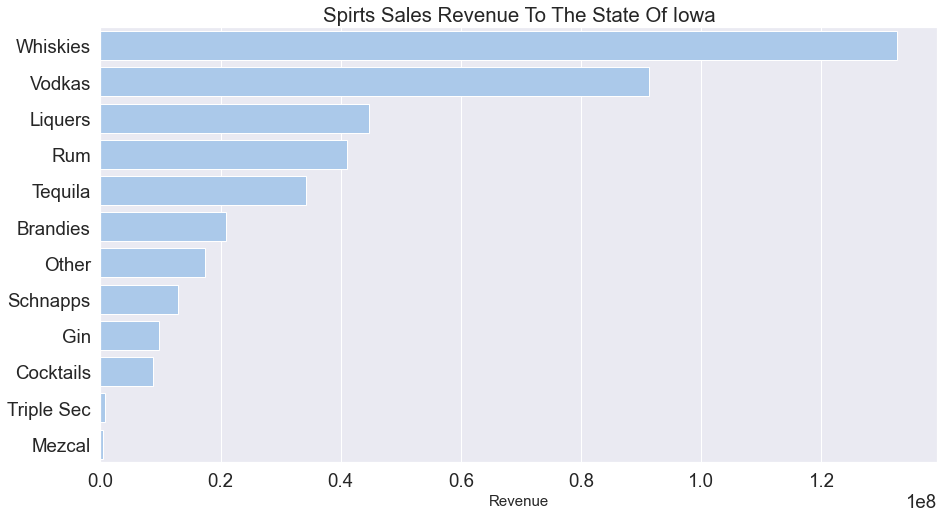

In [86]:
sns.set(font_scale=1.5)
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.7)
sns.set_color_codes("pastel")
bar = sns.barplot(x="revenue", y="New_Category_Name_2", data=df_iowa,
            label="Total", color="b")
# bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
bar.set_xlabel('Revenue',fontsize=15)
bar.set_ylabel('',fontsize=15)
   
# bar.set(xlim=(0,100))
bar.set(title='Spirts Sales Revenue To The State Of Iowa')


In [38]:
# ['yes' if v == 1 else 'no' if v == 2 else 'idle' for v in l]

# len(['Other' if categ in list_other else categ for categ in store_trans_cluster.New_Category_Name])
# store_trans_cluster['New_Category_Name_2'] = ['Other' if categ in list_other else categ for categ in store_trans_cluster.New_Category_Name]

In [39]:
# iowa = round(store_trans_cluster.groupby(['New_Category_Name_2'])['revenue'].sum() / store_trans_cluster.revenue.sum()*100,2).to_frame().sort_values(by='revenue', ascending=False).reset_index()

In [40]:
# ['Vodkas','Whiskies','Rum','Whiskey Liqueur','Tequila']
# [Whiskies,Vodkas,Rum,Tequila,Liquers]

In [41]:
# sns.set(font_scale=1.5)
# sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
# sns.set_color_codes("pastel")
# bar = sns.barplot(x="revenue", y="New_Category_Name_2", data=iowa,
#             label="Total", color="b")
# # bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
# bar.set_xlabel('Percent of Total State Revenue',fontsize=15)
# bar.set_ylabel('Category',fontsize=15)
   
# bar.set(xlim=(0,100))
# bar.set(title='Iowa')


In [42]:
store_trans_cluster.shape

(2473851, 16)

In [43]:
clust_dict ={'Cheap':'Moderately Priced', 'High_End':'High End', 'Moderately_High':'Expensive', 
             'Most_Variety':'Most Variety', 'Popular_Bottles':'Popular Bottles','Quick_Shots':'Quick Shots',
            'Volume_For_Dollar':'Volume For Dollar'}


store_trans_cluster['New_Cluster_Name'] = store_trans_cluster['cluster_name'].map(clust_dict)

In [44]:
tot_revenue_clusters = store_trans_cluster.groupby(['New_Cluster_Name']).agg({'revenue':'sum'})

In [45]:
tot_revenue_clusters = tot_revenue_clusters.reset_index()

In [46]:
# rename columns
tot_revenue_clusters.columns = ['cluster_name','cluster_total_revenue']
tot_revenue_clusters

,cluster_name,cluster_total_revenue
0,Expensive,"24,300,662.05"
1,High End,"3,388,663.93"
2,Moderately Priced,"91,438,354.48"
3,Most Variety,"94,427,582.37"
4,Popular Bottles,"110,869,602.64"
5,Quick Shots,"14,908,410.26"
6,Volume For Dollar,"75,655,642.21"


In [47]:
clust_dict ={'Cheap':'Moderately Priced', 'High_End':'High End', 'Moderately_High':'Expensive', 
             'Most_Variety':'Most Variety', 'Popular_Bottles':'Popular Bottles','Quick_Shots':'Quick Shots',
            'Volume_For_Dollar':'Volume For Dollar'}


store_trans_cluster['New_Cluster_Name'] = store_trans_cluster['cluster_name'].map(clust_dict)

In [48]:
cluster_revenue_by_New_Category_Name = store_trans_cluster.groupby(['New_Cluster_Name','New_Category_Name_2']).agg({'revenue':'sum','Item_Number':'nunique'})  

In [49]:
cluster_revenue_by_New_Category_Name = cluster_revenue_by_New_Category_Name.reset_index()

In [50]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

cluster_revenue_by_New_Category_Name.head() #New_Category_Name_2

,New_Cluster_Name,New_Category_Name_2,revenue,Item_Number
0,Expensive,Brandies,"1,705,715.32",32
1,Expensive,Cocktails,"42,339.96",2
2,Expensive,Gin,"59,314.7",17
3,Expensive,Liquers,"1,194,593.43",20
4,Expensive,Mezcal,"165,191.14",28


In [51]:
# rename columns
cluster_revenue_by_New_Category_Name.columns = ['cluster_name','New_Category_Name_2','revenue','Item_Number']
cluster_revenue_by_New_Category_Name.head()

,cluster_name,New_Category_Name_2,revenue,Item_Number
0,Expensive,Brandies,"1,705,715.32",32
1,Expensive,Cocktails,"42,339.96",2
2,Expensive,Gin,"59,314.7",17
3,Expensive,Liquers,"1,194,593.43",20
4,Expensive,Mezcal,"165,191.14",28


In [52]:
tot_revenue_clusters.head()

,cluster_name,cluster_total_revenue
0,Expensive,"24,300,662.05"
1,High End,"3,388,663.93"
2,Moderately Priced,"91,438,354.48"
3,Most Variety,"94,427,582.37"
4,Popular Bottles,"110,869,602.64"


In [53]:
# us.merge(census_combined4,how='inner',left_on='ZCTA5CE20', right_on='Zip_Code')
cluster_revenue_pct = cluster_revenue_by_New_Category_Name.merge(tot_revenue_clusters, how='inner')

In [54]:
cluster_revenue_pct.head(200)

,cluster_name,New_Category_Name_2,revenue,Item_Number,cluster_total_revenue
0,Expensive,Brandies,"1,705,715.32",32,"24,300,662.05"
1,Expensive,Cocktails,"42,339.96",2,"24,300,662.05"
2,Expensive,Gin,"59,314.7",17,"24,300,662.05"
3,Expensive,Liquers,"1,194,593.43",20,"24,300,662.05"
4,Expensive,Mezcal,"165,191.14",28,"24,300,662.05"
5,Expensive,Other,"2,649,229.33",184,"24,300,662.05"
6,Expensive,Rum,"119,739.84",34,"24,300,662.05"
7,Expensive,Tequila,"5,803,428.32",111,"24,300,662.05"
8,Expensive,Vodkas,"169,404.43",11,"24,300,662.05"
9,Expensive,Whiskies,"12,391,705.58",438,"24,300,662.05"


In [55]:
cluster_revenue_pct['revenue_pct'] = round(cluster_revenue_pct.revenue / cluster_revenue_pct.cluster_total_revenue *100,2)

In [56]:
cluster_revenue_pct2 = cluster_revenue_pct.copy()

In [81]:
top5 = ['Whiskies','Vodkas','Liquers','Rum','Tequila']
# [Whiskies,Vodkas,Rum,Tequila,Liquers]
not_keeps = ['High End', 'Quick Shots']

In [82]:
cluster_revenue_pct2 = cluster_revenue_pct2[cluster_revenue_pct2['New_Category_Name_2'].isin(top5)]

In [83]:
# cluster_revenue_pct2 = 
cluster_revenue_pct2 = cluster_revenue_pct2[~cluster_revenue_pct2['cluster_name'].isin(not_keeps) ]

##### create side by side bar graph of top 5 in revenue for state  for clusters used in store clustering

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


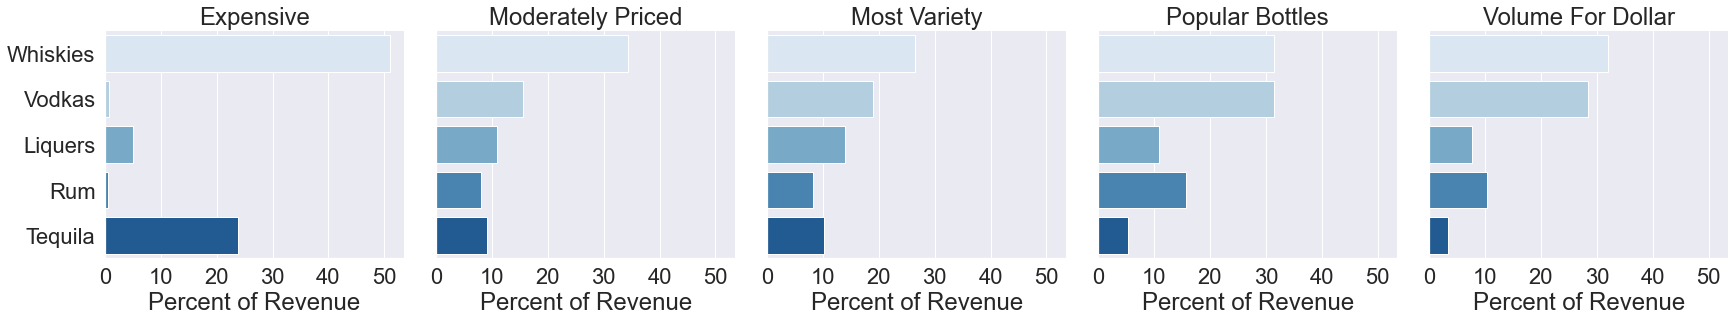

In [84]:
# combined= compare_percent('age')
# combined['Percent']= round(combined['Percent'])

# set style
# sns.set_style('darkgrid')

# color_order=['Kitten','Young','Adult','Senior']
# order=color_order,palette='Blues'
sns.set(rc = {'figure.figsize':(15,8)},font_scale=2)
# order=['Vodkas','Whiskies','Rum','Whiskey Liqueur','Tequila']
order=top5
chart = sns.factorplot(y='New_Category_Name_2', x='revenue_pct', col='cluster_name', data=cluster_revenue_pct2, kind='bar', ci=False, \
                       order=order, palette='Blues')#,estimator=x)  #,color='skyblue'


# for i in range(len(df)):
#     chart.annotate(str(df[i]), xy=(i, df[i]),horizontalalignment = 'center',fontsize=20);


chart.set(ylabel="", xlabel = "Percent of Revenue")

# plt.figure(figsize = (15,8))

chart.set_titles(col_template= '{col_name}',fontsize='14');



#set font size 
# sns.set(font_scale=1.5)
#sns.set(font_scale=2)
#plt.figure(figsize = (15,8))

# plt.savefig('Days_On_Site_comparison nodup.png', dpi=300)
sns.set(rc = {'figure.figsize':(15,8)})

# # for legend text
# plt.setp(chart.get_legend().get_texts(), fontsize='13') 
 
# # for legend title
# plt.setp(chart.get_legend().get_title(), fontsize='14') 
plt.show()
#combined.info()

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


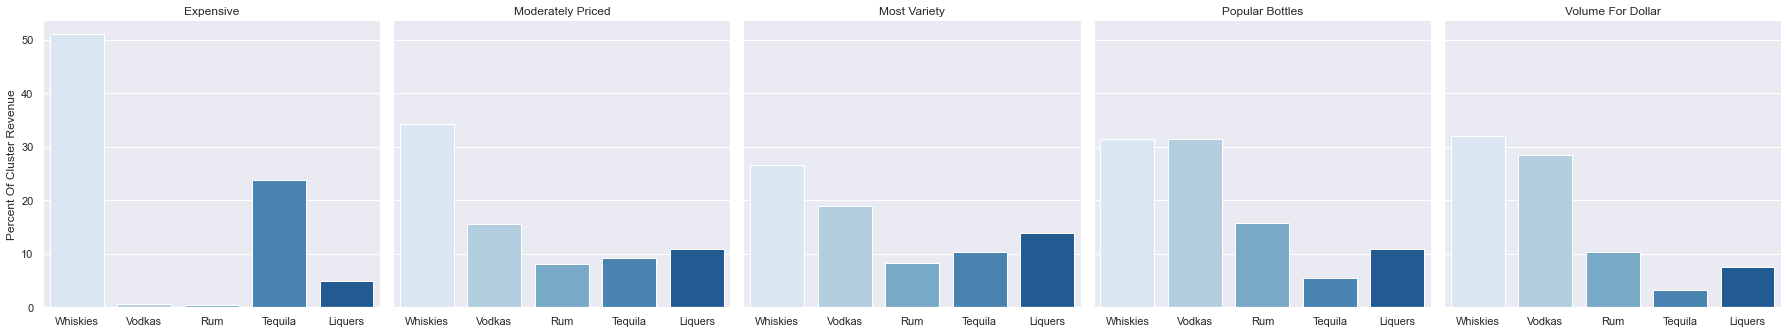

In [61]:
# combined= compare_percent('sex')
# sns.set_style('darkgrid')
# order=['Vodkas','Whiskies','Rum','Whiskey Liqueur','Tequila']
order = top5
chart = sns.factorplot( y='revenue_pct', x='New_Category_Name_2', col='cluster_name', data=cluster_revenue_pct2,\
                       kind='bar',palette='Blues',order=order)
chart.set(ylabel = "Percent Of Cluster Revenue", xlabel="")

chart.set_titles(col_template= '{col_name}');

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


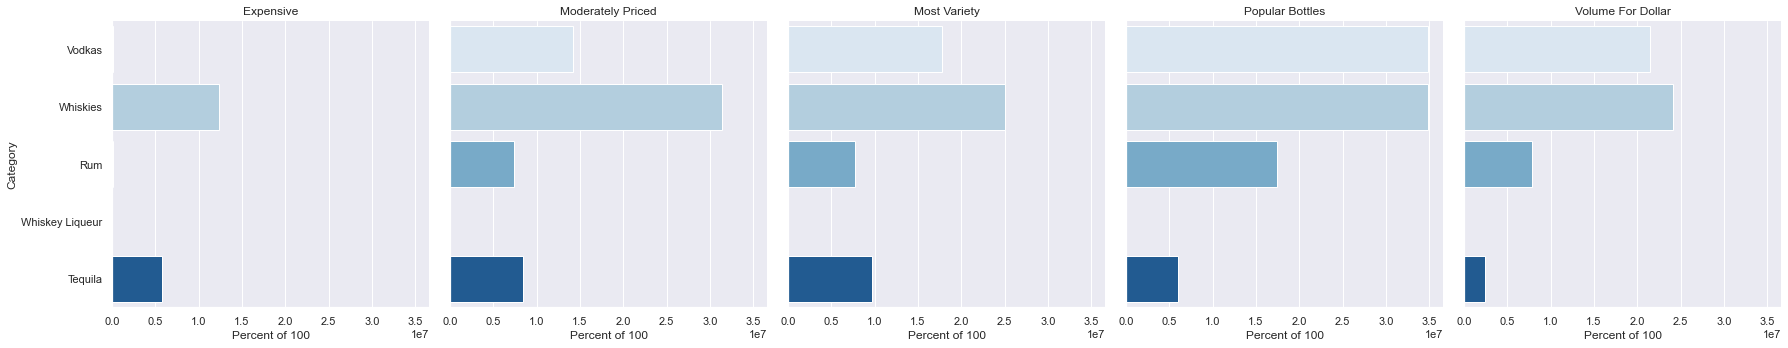

<Figure size 1080x576 with 0 Axes>

In [62]:
# combined= compare_percent('age')
# combined['Percent']= round(combined['Percent'])

# set style
# sns.set_style('darkgrid')

# color_order=['Kitten','Young','Adult','Senior']
order=['Vodkas','Whiskies','Rum','Whiskey Liqueur','Tequila']
# order=color_order,palette='Blues'
chart = sns.factorplot(y='New_Category_Name_2', x='revenue', col='cluster_name', data=cluster_revenue_pct2, kind='bar', ci=False, \
                       order=order, palette='Blues')#,estimator=x)  #,color='skyblue'


# for i in range(len(df)):
#     chart.annotate(str(df[i]), xy=(i, df[i]),horizontalalignment = 'center',fontsize=20);


chart.set(ylabel="Category", xlabel = "Percent of 100")

plt.figure(figsize = (15,8))

chart.set_titles(col_template= '{col_name}',fontsize='14');



#set font size 
# sns.set(font_scale=1.5)
#sns.set(font_scale=2)
#plt.figure(figsize = (15,8))

# plt.savefig('Days_On_Site_comparison nodup.png', dpi=300)
sns.set(rc = {'figure.figsize':(15,8)})

# # for legend text
# plt.setp(chart.get_legend().get_texts(), fontsize='13') 
 
# # for legend title
# plt.setp(chart.get_legend().get_title(), fontsize='14') 
plt.show()
#combined.info()

### Cheap 

In [63]:
# Cheap
Moderately_Priced_df = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Moderately Priced',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)
Moderately_Priced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 29 to 27
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cluster_name         10 non-null     object 
 1   New_Category_Name_2  10 non-null     object 
 2   revenue_pct          10 non-null     float64
 3   Item_Number          10 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [64]:
# sns.set(font_scale=1.5)
# sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
# sns.set_color_codes("pastel")
# bar = sns.barplot(x="revenue_pct", y="New_Category_Name_2", data=Moderately_Priced_df,
#             label="Total", color="b")
# # bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
# bar.set_xlabel('Percent of 100',fontsize=15)
# bar.set_ylabel('Category',fontsize=15)
   
# bar.set(xlim=(0,100))
# bar.set(title='Moderately Priced')


In [65]:
def make_bar(df, title=None):    
    sns.set(font_scale=1.5)
    sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
    sns.set_color_codes("pastel")
    bar = sns.barplot(x="revenue_pct", y="New_Category_Name_2", data=df,
                label="Total", color="b")
    # bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
    bar.set_xlabel('Percent of Cluster Total Revenue ',fontsize=15)
    bar.set_ylabel('Category',fontsize=15)

    bar.set(xlim=(0,100))
    if title:
        bar.axes.set_title(title,fontsize=25)


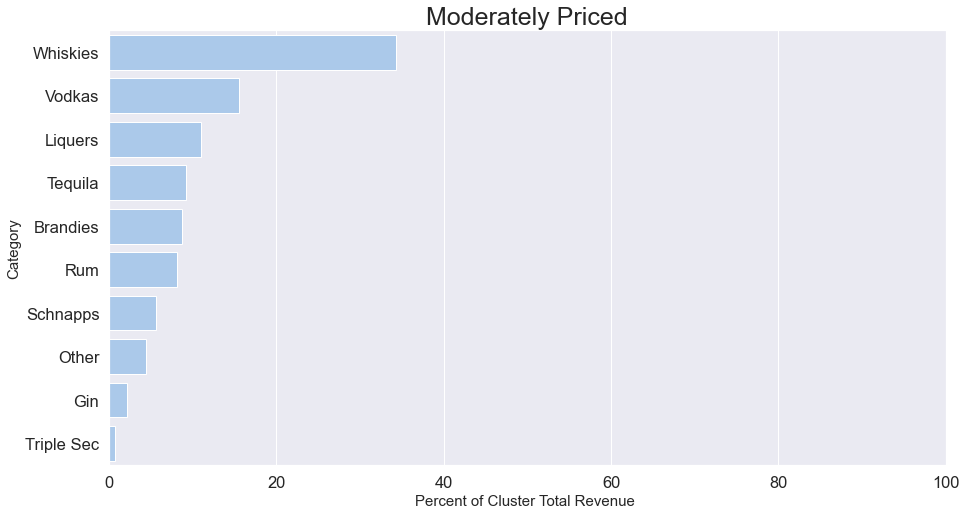

In [66]:
make_bar(Moderately_Priced_df,title='Moderately Priced')

In [67]:
# High_End
High_End = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'High End',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

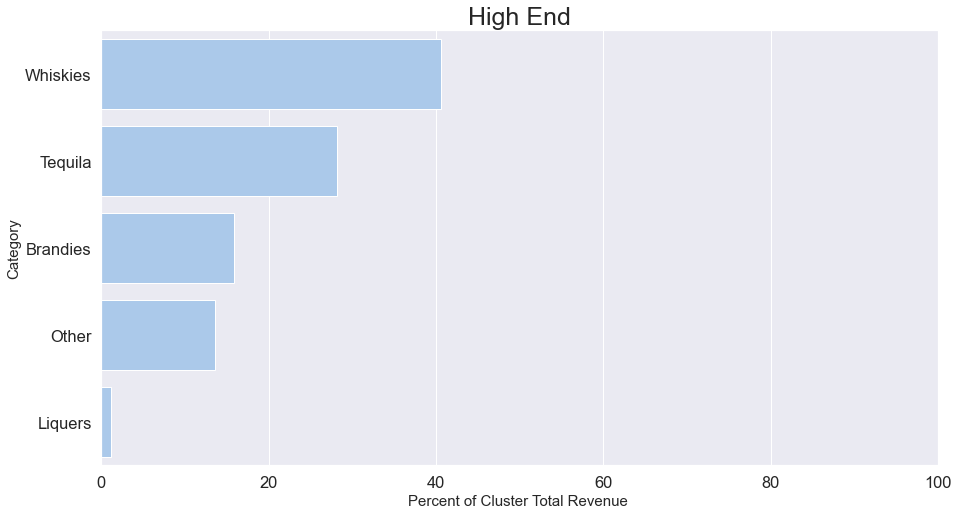

In [68]:
 make_bar(High_End.loc[High_End.revenue_pct >= 1],title='High End')

In [69]:
# Moderately_High
Expensive = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Expensive',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

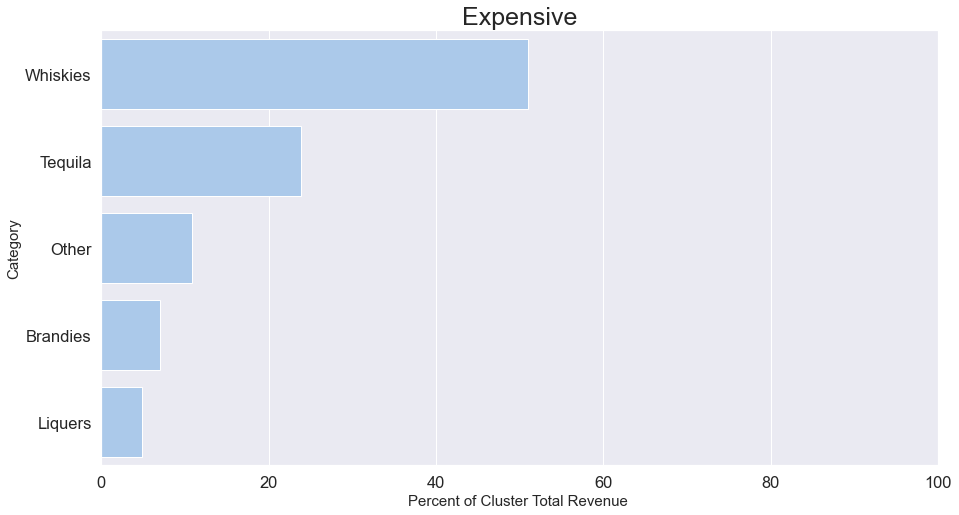

In [70]:
# bar(Expensive.loc[Expensive.revenue_pct >= 1],title='Expensive')
make_bar(Expensive.loc[Expensive.revenue_pct >= 1],title='Expensive')

In [71]:
type(bar)

matplotlib.axes._subplots.AxesSubplot

In [72]:
# Most_Variety
Most_Variety = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Most Variety',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

In [73]:
# make_bar(Most_Variety,title='Most Variety')

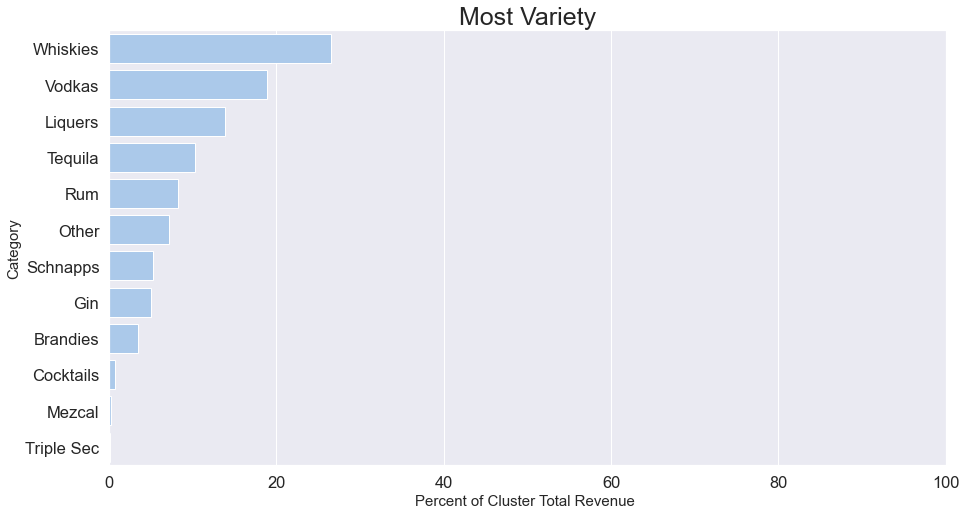

In [74]:
make_bar(Most_Variety,title='Most Variety')

In [75]:
# Popular_Bottles
Popular_Bottles = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Popular Bottles',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

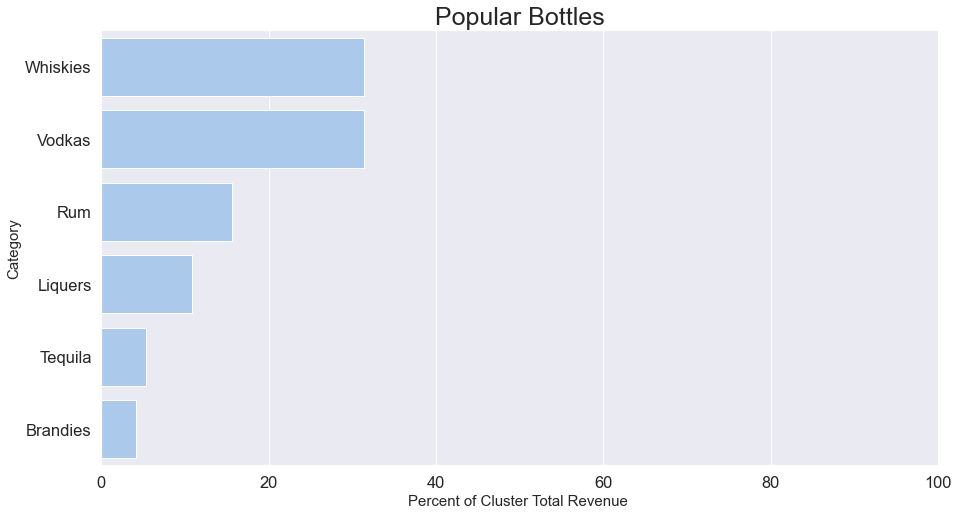

In [76]:
make_bar(Popular_Bottles.loc[Popular_Bottles.revenue_pct >= 1],title='Popular Bottles')

In [77]:
# Quick_Shots
Quick_Shots = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Quick Shots',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

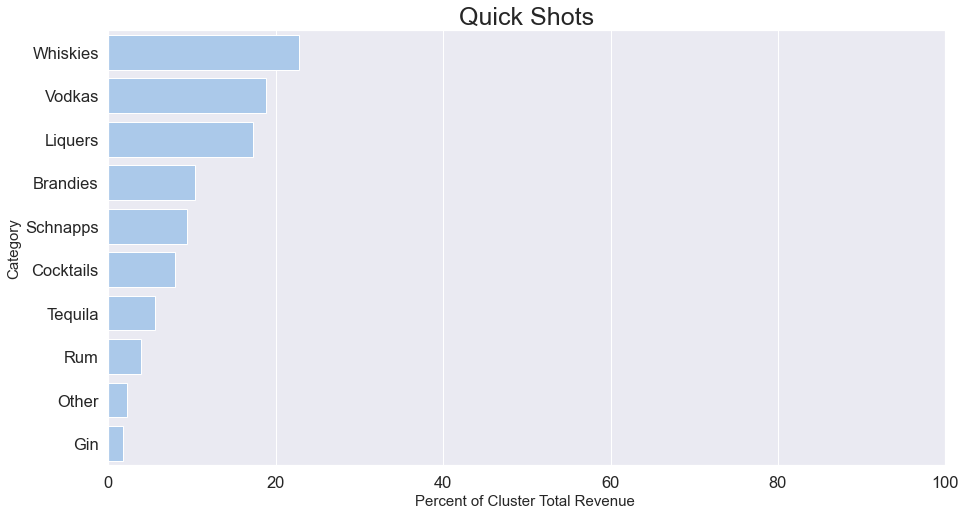

In [78]:
make_bar(Quick_Shots.loc[Quick_Shots.revenue_pct >= 0.5],title='Quick Shots')

In [79]:
# Volume_For_Dollar
Volume_For_Dollar = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Volume For Dollar',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

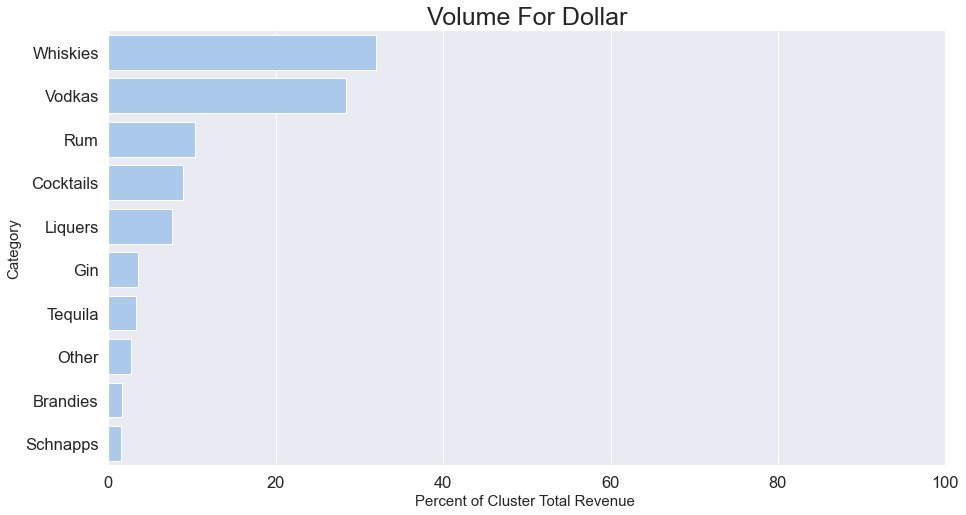

In [80]:
make_bar(Volume_For_Dollar,title='Volume For Dollar')